# Decision Trees

In [2]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import acquire
import prepare

In [3]:
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

### Using the titanic data

#### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [30]:
# acquire, prepare

df = acquire.get_titanic_data()
df = prepare.prep_titanic(df)
df = df.drop(columns=['pclass', 'passenger_id', 'sex', 'embark_town'])

In [23]:
train, validate, test = prepare.split(df)
train.shape, validate.shape, test.shape

((498, 11), (214, 11), (179, 11))

In [24]:
train.head()

,survived,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
689,1,0,1,211.3375,Southampton,0,1,0,0,0,1
84,1,0,0,10.5000,Southampton,1,1,0,0,0,1
738,0,0,0,7.8958,Southampton,1,0,1,0,0,1
441,0,0,0,9.5000,Southampton,1,0,1,0,0,1
643,1,0,0,56.4958,Southampton,1,0,1,0,0,1


In [7]:
train.survived.value_counts()

0    302
1    196
Name: survived, dtype: int64

In [8]:
# making baseline prediction

train['baseline_pred'] = 0

In [9]:
# calculating accuracy

baseline_accuracy = (train.survived == train.baseline_pred).mean()
print(f'baseline prediction accuracy: {baseline_accuracy:.2%}')

baseline prediction accuracy: 60.64%


#### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [31]:
# splitting data

train, validate, test = prepare.split(df, stratify_by='survived')

In [32]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sibsp                    498 non-null    int64  
 1   parch                    498 non-null    int64  
 2   fare                     498 non-null    float64
 3   embark_town              498 non-null    object 
 4   alone                    498 non-null    int64  
 5   sex_female               498 non-null    uint8  
 6   sex_male                 498 non-null    uint8  
 7   embark_town_Cherbourg    498 non-null    uint8  
 8   embark_town_Queenstown   498 non-null    uint8  
 9   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(1), int64(3), object(1), uint8(5)
memory usage: 25.8+ KB


In [18]:
X_train.head()

,sex,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
583,male,0,0,40.1250,Cherbourg,1,0,1,1,0,0
165,male,0,2,20.5250,Southampton,0,0,1,0,0,1
50,male,4,1,39.6875,Southampton,0,0,1,0,0,1
259,female,0,1,26.0000,Southampton,0,1,0,0,0,1
306,female,0,0,110.8833,Cherbourg,1,1,0,1,0,0


In [19]:
y_train.head()

583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

In [27]:
# creating the tree

tree = DecisionTreeClassifier(max_depth = 3)

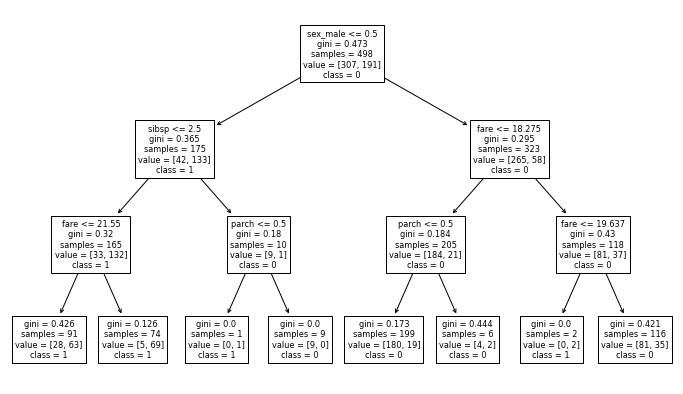

In [33]:
# fit the model to sample data

tree.fit(X_train, y_train)
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

#### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [34]:
tree.predict(X_train)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
predictions = tree.predict(X_train)
actual = y_train

In [36]:
confusion_matrix(actual, predictions)

array([[274,  33],
       [ 56, 135]])

In [37]:
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,274,33
1,56,135


#### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [38]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       307
           1       0.80      0.71      0.75       191

    accuracy                           0.82       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498



#### 5. Run through steps 2-4 using a different max_depth value.

In [39]:
# creating the tree

tree = DecisionTreeClassifier(max_depth = 5)

In [40]:
# fit the tree to sample data

tree.fit(X_train, y_train)
print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- sibsp <= 2.50
|   |   |--- fare <= 21.55
|   |   |   |--- sibsp <= 0.50
|   |   |   |   |--- fare <= 8.67
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fare >  8.67
|   |   |   |   |   |--- class: 1
|   |   |   |--- sibsp >  0.50
|   |   |   |   |--- fare <= 15.37
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fare >  15.37
|   |   |   |   |   |--- class: 1
|   |   |--- fare >  21.55
|   |   |   |--- parch <= 2.50
|   |   |   |   |--- parch <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- parch >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- parch >  2.50
|   |   |   |   |--- fare <= 32.88
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fare >  32.88
|   |   |   |   |   |--- class: 0
|   |--- sibsp >  2.50
|   |   |--- fare <= 18.46
|   |   |   |--- class: 1
|   |   |--- fare >  18.46
|   |   |   |--- class: 0
|--- sex_male >  0.50
|   |--- fare <= 18.27
|   |   |--- parch <= 0.50
|   |   |   |--- fare <= 1

In [41]:
# evaluate in-sample results

tree.predict(X_train)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
predictions = tree.predict(X_train)
actual = y_train

In [43]:
confusion_matrix(actual, predictions)

array([[283,  24],
       [ 58, 133]])

In [44]:
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,283,24
1,58,133


In [45]:
# accuracy

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       307
           1       0.85      0.70      0.76       191

    accuracy                           0.84       498
   macro avg       0.84      0.81      0.82       498
weighted avg       0.84      0.84      0.83       498



#### 6. Which model performs better on your in-sample data?

In [76]:
# second model performs better

#### Which model performs best on your out-of-sample data, the validate set?

In [47]:
predictions = tree.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       132
           1       0.75      0.67      0.71        82

    accuracy                           0.79       214
   macro avg       0.78      0.77      0.77       214
weighted avg       0.79      0.79      0.79       214



### Using Telco dataset

#### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [79]:
df = acquire.get_telco_data()
df = prepare.prep_telco(df)

In [81]:
pd.set_option('display.max_columns', None)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,Mailed check,DSL,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,Mailed check,DSL,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Mailed check,Fiber optic,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0


In [84]:
train, validate, test = prepare.split(df)

In [85]:
train.churn.value_counts()

No     2893
Yes    1050
Name: churn, dtype: int64

In [87]:
train['basline_pred'] = 'No'

In [89]:
accuracy = (train.churn == train.basline_pred).mean()
print(f'baseline prediction accuracy: {accuracy:.2%}')

baseline prediction accuracy: 73.37%


In [158]:
X = df[['payment_type_Electronic check', 'payment_type_Mailed check', 'contract_type_One year','contract_type_Two year', 'total_charges']]
y = df.churn

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [102]:
X_train.head()

,payment_type_Electronic check,payment_type_Mailed check,contract_type_One year,contract_type_Two year,total_charges
1853,1,0,1,0,99.45
469,1,0,0,0,154.85
1062,0,0,0,0,2585.95
260,0,1,0,1,967.85
6529,0,0,0,0,169.45


#### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [159]:
# Create the decision tree object and specify hyperparams
tree1 = DecisionTreeClassifier(max_depth = 10)

In [160]:
tree1.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree1, feature_names=X_train.columns.tolist()))

|--- contract_type_Two year <= 0.50
|   |--- contract_type_One year <= 0.50
|   |   |--- payment_type_Electronic check <= 0.50
|   |   |   |--- total_charges <= 344.08
|   |   |   |   |--- total_charges <= 341.62
|   |   |   |   |   |--- total_charges <= 185.93
|   |   |   |   |   |   |--- total_charges <= 68.92
|   |   |   |   |   |   |   |--- total_charges <= 51.18
|   |   |   |   |   |   |   |   |--- total_charges <= 44.62
|   |   |   |   |   |   |   |   |   |--- total_charges <= 32.03
|   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- total_charges >  32.03
|   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- total_charges >  44.62
|   |   |   |   |   |   |   |   |   |--- total_charges <= 44.73
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- total_charges >  44.73
|   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |--- 

#### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [115]:
tree1.predict(X_train)

array(['No', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [116]:
predictions = tree1.predict(X_train)
actual = y_train

In [117]:
confusion_matrix(actual, predictions)

array([[2600,  287],
       [ 479,  578]])

In [118]:
pd.crosstab(actual, predictions)

col_0,No,Yes
churn,,
No,2600,287
Yes,479,578


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


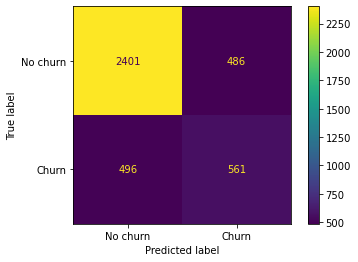

In [120]:
plot_confusion_matrix(tree, X_train, y_train, display_labels=['No churn', 'Churn'])

#### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [121]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      2887
         Yes       0.67      0.55      0.60      1057

    accuracy                           0.81      3944
   macro avg       0.76      0.72      0.74      3944
weighted avg       0.80      0.81      0.80      3944



#### 5. Run through steps 2-4 using a different max_depth value.

In [154]:
# model 2

X = df[['payment_type_Electronic check', 'payment_type_Mailed check', 'contract_type_One year','contract_type_Two year', 'total_charges', 'tenure']]
y = df.churn

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [155]:
tree2 = DecisionTreeClassifier(max_depth = 30)

In [156]:
# Fit the decision tree classifier to your training sample and transform

tree2.fit(X_train, y_train)

# Rudimentary visualization of model structure

print(export_text(tree2, feature_names=X_train.columns.tolist()))

|--- tenure <= 16.50
|   |--- payment_type_Electronic check <= 0.50
|   |   |--- tenure <= 5.50
|   |   |   |--- total_charges <= 68.92
|   |   |   |   |--- tenure <= 1.50
|   |   |   |   |   |--- contract_type_Two year <= 0.50
|   |   |   |   |   |   |--- total_charges <= 50.68
|   |   |   |   |   |   |   |--- total_charges <= 49.88
|   |   |   |   |   |   |   |   |--- total_charges <= 44.62
|   |   |   |   |   |   |   |   |   |--- total_charges <= 35.58
|   |   |   |   |   |   |   |   |   |   |--- total_charges <= 29.93
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |   |--- total_charges >  29.93
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- total_charges >  35.58
|   |   |   |   |   |   |   |   |   |   |--- total_charges <= 44.10
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- total_charges

In [128]:
tree2.predict(X_train)

array(['No', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [130]:
predictions = tree2.predict(X_train)
actual = y_train

In [131]:
# Evaluate your in-sample results using the model score, confusion matrix, and classification report.

confusion_matrix(actual, predictions)

array([[2883,    4],
       [  18, 1039]])

In [133]:
pd.crosstab(actual, predictions)

col_0,No,Yes
churn,,
No,2883,4
Yes,18,1039


In [135]:
# Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

          No       0.99      1.00      1.00      2887
         Yes       1.00      0.98      0.99      1057

    accuracy                           0.99      3944
   macro avg       0.99      0.99      0.99      3944
weighted avg       0.99      0.99      0.99      3944



In [136]:
# model 3

X = df[['payment_type_Electronic check', 'payment_type_Mailed check', 'contract_type_One year','contract_type_Two year', 'total_charges', 'tenure']]
y = df.churn

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [144]:
tree3 = DecisionTreeClassifier(max_depth = 16)

In [145]:
# Fit the decision tree classifier to your training sample and transform

tree3.fit(X_train, y_train)

# Rudimentary visualization of model structure

print(export_text(tree3, feature_names=X_train.columns.tolist()))

|--- tenure <= 16.50
|   |--- payment_type_Electronic check <= 0.50
|   |   |--- tenure <= 5.50
|   |   |   |--- total_charges <= 68.92
|   |   |   |   |--- tenure <= 1.50
|   |   |   |   |   |--- contract_type_Two year <= 0.50
|   |   |   |   |   |   |--- total_charges <= 50.68
|   |   |   |   |   |   |   |--- total_charges <= 49.88
|   |   |   |   |   |   |   |   |--- total_charges <= 44.62
|   |   |   |   |   |   |   |   |   |--- total_charges <= 35.58
|   |   |   |   |   |   |   |   |   |   |--- total_charges <= 29.93
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- total_charges >  29.93
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- total_charges >  35.58
|   |   |   |   |   |   |   |   |   |   |--- total_charges <= 44.10
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- total_charges 

In [146]:
tree3.predict(X_train)

array(['No', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [147]:
predictions = tree3.predict(X_train)
actual = y_train

In [148]:
# Evaluate your in-sample results using the model score, confusion matrix, and classification report.

confusion_matrix(actual, predictions)

array([[2843,   44],
       [ 148,  909]])

In [149]:
pd.crosstab(actual, predictions)

col_0,No,Yes
churn,,
No,2843,44
Yes,148,909


In [150]:
# Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

          No       0.95      0.98      0.97      2887
         Yes       0.95      0.86      0.90      1057

    accuracy                           0.95      3944
   macro avg       0.95      0.92      0.94      3944
weighted avg       0.95      0.95      0.95      3944



#### 6. Which model performs better on your in-sample data?

In [151]:
# model 3 performs better on in-sample data

#### 7. Which model performs best on your out-of-sample data, the validate set?

In [161]:
predictions = tree1.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

          No       0.83      0.87      0.85       741
         Yes       0.53      0.46      0.49       245

    accuracy                           0.76       986
   macro avg       0.68      0.66      0.67       986
weighted avg       0.76      0.76      0.76       986



In [164]:
predictions = tree1.predict(X_test)
actual = y_test

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

          No       0.80      0.87      0.84      1546
         Yes       0.54      0.43      0.48       567

    accuracy                           0.75      2113
   macro avg       0.67      0.65      0.66      2113
weighted avg       0.73      0.75      0.74      2113



In [157]:
predictions = tree2.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

          No       0.84      0.78      0.81       741
         Yes       0.44      0.54      0.49       245

    accuracy                           0.72       986
   macro avg       0.64      0.66      0.65       986
weighted avg       0.74      0.72      0.73       986



In [152]:
predictions = tree3.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

          No       0.84      0.82      0.83       741
         Yes       0.49      0.53      0.51       245

    accuracy                           0.74       986
   macro avg       0.66      0.67      0.67       986
weighted avg       0.75      0.74      0.75       986

